In [3]:
from DRP_rotation_curve import extract_data, extract_Pipe3d_data
from rotation_fitfunctions import find_phi, find_incl, find_axis_ratio
from astropy.table import Table
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


In [4]:
#where the data lives
MANGA_FOLDER = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/'
VEL_MAP_FOLDER = MANGA_FOLDER + 'analysis/v3_1_1/3.1.0/HYB10-MILESHC-MASTARSSP/'
DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/' + 'drpall-v3_1_1.fits'

In [5]:
#reading in DRP_all
DRP_table = Table.read(DRP_FILENAME, 'MANGA')

DRP_index = {}

for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]

    DRP_index[galaxy_ID] = i


In [875]:
#galaxy being checked
gal_ID = '9893-3703'

In [876]:
#reading in velocity map and getting center/phi
maps = extract_data(VEL_MAP_FOLDER,gal_ID,['Ha_vel', 'r_band', 'Ha_flux', 'Ha_sigma'])
SN_map = maps['Ha_flux'] * np.sqrt(maps['Ha_flux_ivar'])
vmap_mask = maps['Ha_vel_mask'] + (SN_map < 5)
maps['vmasked'] = ma.array(maps['Ha_vel'], mask=vmap_mask)
maps['ivarmasked'] = ma.array(maps['Ha_vel_ivar'], mask=vmap_mask)
maps['rbandmasked'] = ma.array(maps['r_band'], mask = maps['Ha_vel_mask'])
i_DRP = DRP_index[gal_ID]
shape = maps['vmasked'].shape
center = np.unravel_index(ma.argmax(maps['rbandmasked']), shape)
phi = DRP_table['nsa_elpetro_phi'][i_DRP] 
new_phi = find_phi(center, phi, maps['vmasked'])
phi *= np.pi/180
print(phi,new_phi)
print(shape)

-36.503353
(22, 22)
1.133299879185234
[25 14] 0.4
1.133299879185234 1.133299879185234
(44, 44)


(22, 22)


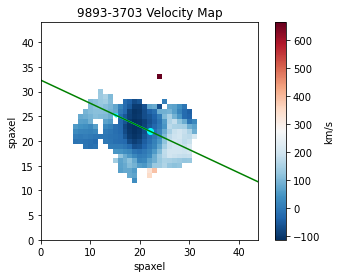

In [877]:
print(center)
plt.imshow(maps['vmasked'],origin='lower',cmap='RdBu_r')
cbar = plt.colorbar()
plt.plot(center[0],center[1],marker='o',color='cyan')
plt.quiver([center[0]],[center[1]],[-np.sin(new_phi)],[np.cos(new_phi)],scale=5,color='cyan')
y= np.linspace(0,shape[0])
plt.plot(-((np.tan(phi))*(y-center[1]))+center[0],y,color='green')
plt.xlim(0,shape[0])
plt.ylim(0,shape[1])
plt.xlabel('spaxel')
plt.ylabel('spaxel')
plt.title(gal_ID+' Velocity Map')

cbar.set_label('km/s')



In [878]:
full_fail['visual code'][fail_index[gal_ID]] = 3
full_fail.write('/scratch/lstroud3/RotationCurves/failed_objects_table.fits',overwrite='true')
#1 phi wrong, 5 find phi wrong, 4 not sure what wrong, 2 center wrong, 3 weird

In [29]:
full_fail = Table.read('/scratch/lstroud3/RotationCurves/failed_objects_table.fits')

In [36]:
print(full_fail[full_fail['fitting code']==222])

plate ifudsgn   plateifu  mangaid  ... Burkert chi2 fitting code visual code
----- ------- ----------- -------- ... ------------ ------------ -----------
10001   12703 10001-12703  1-55648 ...           --        222.0         4.0
10001    1901  10001-1901  1-55567 ...           --        222.0         4.0
10213    6103  10213-6103  1-44581 ...           --        222.0         4.0
10215    1902  10215-1902 1-153901 ...           --        222.0         4.0
10215    3703  10215-3703 1-122138 ...           --        222.0         4.0
10217    3703  10217-3703 1-458727 ...           --        222.0         4.0
10218    3703  10218-3703 1-383171 ...           --        222.0         4.0
10218    3704  10218-3704 1-412176 ...           --        222.0         4.0
10219   12703 10219-12703 1-556776 ...           --        222.0         4.0
10219   12704 10219-12704 1-383825 ...           --        222.0         4.0
  ...     ...         ...      ... ...          ...          ...         ...

In [38]:
np.unique(full_fail['visual code'],return_counts=True)

(<MaskedColumn name='visual code' dtype='float64' length=6>
 1.0
 2.0
 3.0
 4.0
 5.0
  --,
 array([ 158,   36,  154,  302,   40, 1827]))